In [1]:
cd C:\Nikhil\Analytics Lab\Phishing data\8339691


C:\Nikhil\Analytics Lab\Phishing data\8339691


In [2]:
import pandas as pd
import numpy as np

df1=pd.read_csv('CEAS_08.csv')

In [3]:
############# Data loading ############

In [4]:
df1=pd.DataFrame(data=df1)


In [5]:
df2=pd.read_csv('Enron.csv')


In [6]:
df2=pd.DataFrame(data=df2)


In [7]:
df3=pd.read_csv('Ling.csv')


In [8]:
df3=pd.DataFrame(data=df3)


In [9]:
df4=pd.read_csv('Nazario.csv')


In [10]:
df4=pd.DataFrame(data=df4)


In [11]:
df5=pd.read_csv('Nazario_5.csv')


In [12]:
df5=pd.DataFrame(data=df5)

In [13]:
df6=pd.read_csv('Nigerian_Fraud.csv')


In [14]:
df6=pd.DataFrame(data=df6)


In [15]:
df7=pd.read_csv('SpamAssasin.csv')


In [16]:
df7=pd.DataFrame(data=df7)
df7 = df7.dropna()


In [17]:
df8=pd.read_csv('TREC_05.csv', lineterminator='\n')


In [18]:
df8=pd.DataFrame(data=df8)
df8 = df8.dropna()


In [19]:
df9=pd.read_csv('TREC_06.csv', lineterminator='\n')


In [20]:
df9=pd.DataFrame(data=df9)
df9 = df9.dropna()


In [21]:
df10=pd.read_csv('TREC_07.csv', lineterminator='\n')


In [22]:
df10=pd.DataFrame(data=df10)
df10 = df10.dropna()


In [23]:
dfa=pd.concat([df1,df2,df4,df5,df6,df7,df8,df9,df10])
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202697 entries, 0 to 53756
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sender    172597 non-null  object
 1   receiver  170935 non-null  object
 2   date      172444 non-null  object
 3   subject   202378 non-null  object
 4   body      202697 non-null  object
 5   label     202697 non-null  int64 
 6   urls      172930 non-null  object
dtypes: int64(1), object(6)
memory usage: 12.4+ MB


In [24]:
############# Data cleaning############

In [25]:
dfa.isna().sum()

sender      30100
receiver    31762
date        30253
subject       319
body            0
label           0
urls        29767
dtype: int64

In [26]:
dfa = dfa.dropna()
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170426 entries, 0 to 53756
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sender    170426 non-null  object
 1   receiver  170426 non-null  object
 2   date      170426 non-null  object
 3   subject   170426 non-null  object
 4   body      170426 non-null  object
 5   label     170426 non-null  int64 
 6   urls      170426 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.4+ MB


In [27]:
dfa['urls'].replace(int(0),'URL_Exists',inplace=True)
dfa['urls'].replace(int(1),'NO_URL',inplace=True)

In [28]:
dfa = dfa[['sender', 'receiver', 'date', 'subject','body', 'urls','label']]

In [29]:
FX=dfa.iloc[:,0:6]
FX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170426 entries, 0 to 53756
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sender    170426 non-null  object
 1   receiver  170426 non-null  object
 2   date      170426 non-null  object
 3   subject   170426 non-null  object
 4   body      170426 non-null  object
 5   urls      170426 non-null  object
dtypes: object(6)
memory usage: 9.1+ MB


In [30]:
FX=pd.DataFrame(FX)


In [31]:
FX.describe()

,sender,receiver,date,subject,body,urls
count,170426,170426,170426,170426,170426,170426
unique,92051,30575,165299,101791,167763,470
top,Schedule Crawler <pete.davis@enron.com>,handyboard@media.mit.edu,"Tue, 20 Nov 2001 01:12:13 -0500",CNN.com Daily Top 10,\n\n,NO_URL
freq,2058,3507,10,2986,4,91302


In [32]:
############# Data Visualization ############

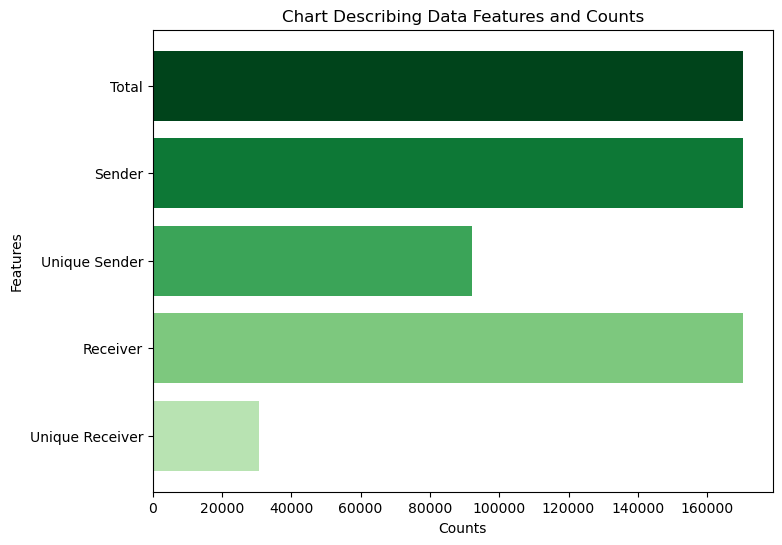

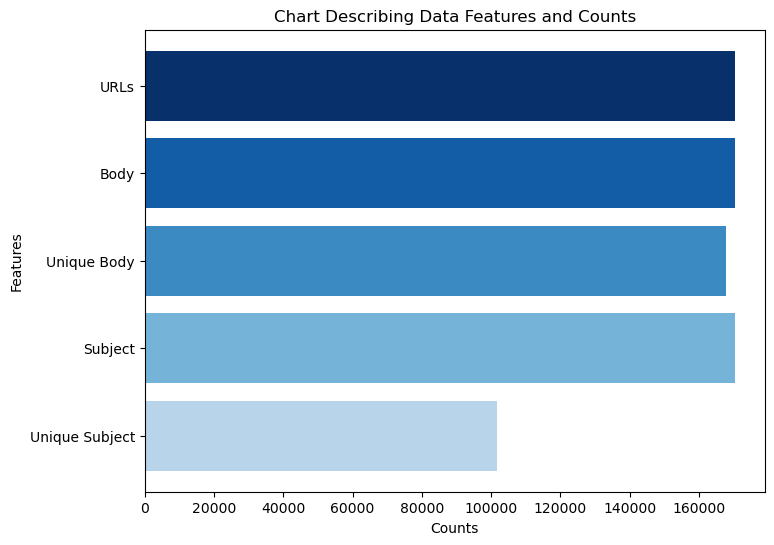

In [33]:
import matplotlib.pyplot as plt
values = [170426,170426,92051,170426,30575]
categories = ['Total', 'Sender', 'Unique Sender', 'Receiver', 'Unique Receiver']

custom_order = ['Unique Receiver', 'Receiver', 'Unique Sender', 'Sender','Total']

# Reorder the categories and values based on the custom order
ordered_values = [values[categories.index(cat)] for cat in custom_order]

colors = plt.cm.Greens(np.linspace(0.3, 1, len(categories)))
# Create a plot
plt.figure(figsize=(8, 6))
plt.barh(custom_order, ordered_values, color=colors)

# Add labels and title

plt.xlabel('Counts')
plt.ylabel('Features')
plt.title('Chart Describing Data Features and Counts')

#plt.xticks(rotation=90)

# Show the plot
plt.show()

values = [170426,101791,170426,167763,170426]
categories = ['Subject','Unique Subject','Body','Unique Body','URLs']

custom_order = ['Unique Subject','Subject','Unique Body','Body','URLs']

# Reorder the categories and values based on the custom order
ordered_values = [values[categories.index(cat)] for cat in custom_order]


colors = plt.cm.Blues(np.linspace(0.3, 1, len(categories)))
# Create a plot
plt.figure(figsize=(8, 6))
plt.barh(custom_order, ordered_values, color=colors)

# Add labels and title

plt.xlabel('Counts')
plt.ylabel('Features')
plt.title('Chart Describing Data Features and Counts')

#plt.xticks(rotation=90)

# Show the plot
plt.show()

0    89515
1    80911
Name: label, dtype: int64


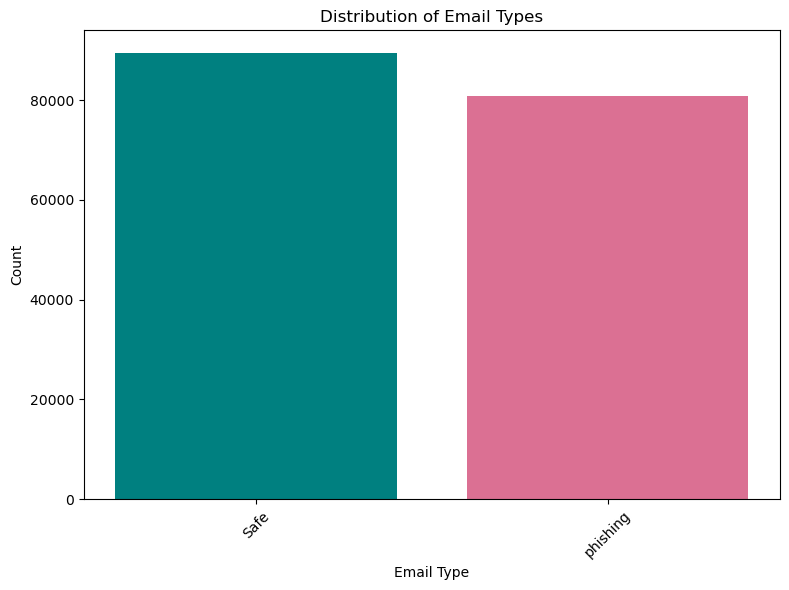

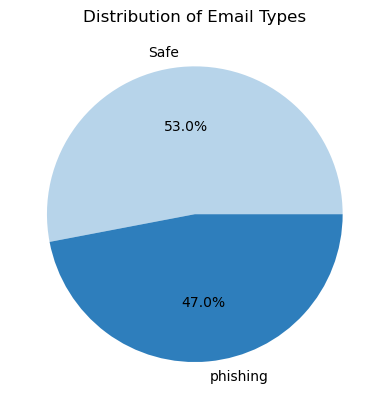

In [34]:
import matplotlib.pyplot as plt

email_type_counts = dfa['label'].value_counts()
print(email_type_counts)

unique_email_types = email_type_counts.index.tolist()

categories = ['Safe', 'phishing']


colors = ['teal', 'palevioletred']

labels = ['Safe', 'phishing'] 
# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(categories, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types')
plt.xticks(unique_email_types,labels, rotation=45,)

# Show the chart
plt.tight_layout()
plt.show()


sizes = [53,47]  # Sizes of each pie slice
labels = ['Safe', 'phishing']  # Labels for each slice
col = plt.cm.Blues(np.linspace(0.3, 0.7, len(categories)))
# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=col)

# Add title
plt.title('Distribution of Email Types')

# Show the plot
plt.show()

In [35]:
#############Text cleaning############

In [36]:
def change_lower (text):
    return text.lower()
    
FX['body'] = FX['body'].apply(change_lower)
FX['sender'] = FX['sender'].apply(change_lower)
FX['receiver'] = FX['receiver'].apply(change_lower)
FX['date'] = FX['date'].apply(change_lower)
FX['subject'] = FX['subject'].apply(change_lower)

In [37]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
stop_words = set(stopwords.words('english'))  # Set of English stopwords

def remove_stopwords(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)  # Join the words back into a sentence

# Apply the function to the 'text' column
FX['body'] = FX['body'].apply(remove_stopwords)
FX['subject'] = FX['subject'].apply(remove_stopwords)

In [39]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'text' column
FX['subject'] = FX['subject'].apply(remove_punctuation)
FX['body'] = FX['body'].apply(remove_punctuation)

In [41]:
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    lemmatized_tokens = [lemmatizer.lemmatize(word, wordnet.VERB) for word in tokens]  # Lemmatize each word as a verb
    return ' '.join(lemmatized_tokens)  # Join the lemmatized tokens back into a sentence

# Apply the function to the 'text' column
FX['body'] = FX['body'].apply(lemmatize_text)
FX['subject'] = FX['subject'].apply(lemmatize_text)

In [43]:
FX['combined'] = FX['sender'] + ' ' + FX['receiver']+ ' ' + FX['subject']+ ' ' + FX['body']+ ' ' + FX['urls']

In [44]:
FX1=pd.DataFrame(FX['combined'])
FX1

,combined
0,young esposito <young@iworld.de> user4@gvc.cea...
1,mok <ipline's1983@icable.ph> user2.2@gvc.ceas-...
2,daily top 10 <karmandeep-opengevl@universalnet...
3,michael parker <ivqrnai@pobox.com> spamassassi...
4,gretchen suggs <externalsep1@loanofficertool.c...
...,...
53752,scc <gerry.rossi4360@kinki-kids.com> deficient...
53753,sydney car centre <merrill8783@168city.com> gn...
53754,philippe grosjean <phgrosjean@sciviews.org> du...
53755,bernhard wellhöfer <bernhard.wellhoefer@gaia-g...


In [45]:
###################### Explained variance ######################################

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
DIM1=dfa.iloc[:,0:6]
vectorizer = TfidfVectorizer()
DIM1 = vectorizer.fit_transform(DIM1)
vectorizer.get_feature_names_out()
DIM1=DIM1.toarray()
y = dfa["label"].values

In [48]:
from sklearn.decomposition import TruncatedSVD
evr=[]
componenets=[1,2,3,4,5]
for i in componenets:
    svd = TruncatedSVD(n_components=i)
    DIM2=svd.fit_transform(DIM1,y)
    e=svd.explained_variance_ratio_.sum()
    e=e*100
    evr.append(e)
print(evr)

[17.707186886792183, 33.06871020911687, 44.67003084906618, 66.49085379287179, 80.10898894896306]


C:\Users\nikhi\AppData\Local\Temp\ipykernel_6972\4024735727.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


<Figure size 800x600 with 0 Axes>

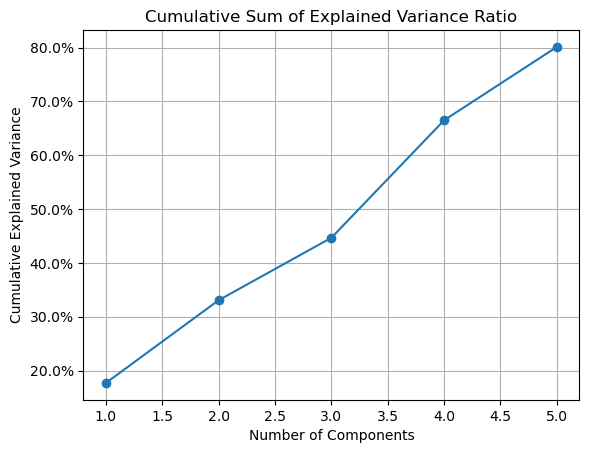

In [49]:
import matplotlib.pyplot as plt
explained_variance_ratio = evr  # Replace with actual explained variance ratios

# Plotting the cumulative sum of explained variance ratio
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
y_value=['{:,.1f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
plt.title('Cumulative Sum of Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')



plt.grid()
plt.show()

In [50]:
###################### Dimension Reduction######################################

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
n_components = 5  # Number of components after reduction
lsa = TruncatedSVD(n_components)

# Create a pipeline for text processing and dimensionality reduction
pipeline = make_pipeline(vectorizer, lsa)

# Fit and transform the data
reduced_features = pipeline.fit_transform(FX1['combined'])


# Access the reduced features
reduced_FX = pd.DataFrame(reduced_features, columns=[f'component_{i+1}' for i in range(n_components)])
#reduced_FX=reduced_FX.reset_index(inplace = True)

# Concatenate the reduced features with the original DataFrame
#df_with_components = pd.concat([FX, reduced_FX], axis=1, ignore_index=True)

# Display the result
#print(df_with_components)
print(reduced_FX)

        component_1  component_2  component_3  component_4  component_5
0          0.056538     0.000776    -0.041933     0.011483     0.081162
1          0.039963     0.015434    -0.024152     0.011732     0.114662
2          0.444288     0.534234     0.183193    -0.300522     0.010806
3          0.043025    -0.013761    -0.024357    -0.002779    -0.006774
4          0.046548     0.002248    -0.011750     0.019807     0.127132
...             ...          ...          ...          ...          ...
170421     0.076539    -0.026626    -0.050734    -0.016672    -0.018132
170422     0.072374    -0.025211    -0.049797    -0.016185    -0.017769
170423     0.104590    -0.054603    -0.101909    -0.032968    -0.054618
170424     0.110999    -0.050227    -0.084836    -0.023501    -0.058703
170425     0.124540    -0.052020    -0.095278    -0.020342    -0.028955

[170426 rows x 5 columns]


In [52]:
X = reduced_FX
y = dfa['label'].values

from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [53]:
###################### Undersampling ######################################

In [54]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=101, sampling_strategy=1)
X_train,y_train = undersample.fit_resample(X_train, y_train)

In [55]:
y_train_rus=pd.DataFrame(y_train)
y_train_rus.value_counts()

0    56627
1    56627
dtype: int64

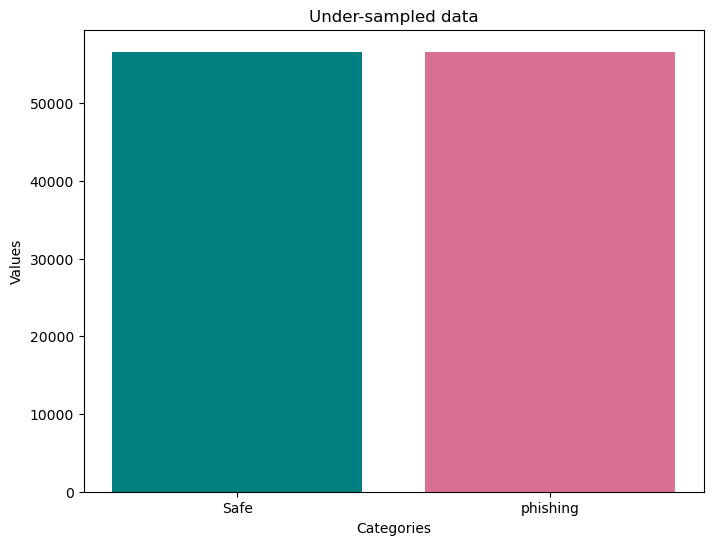

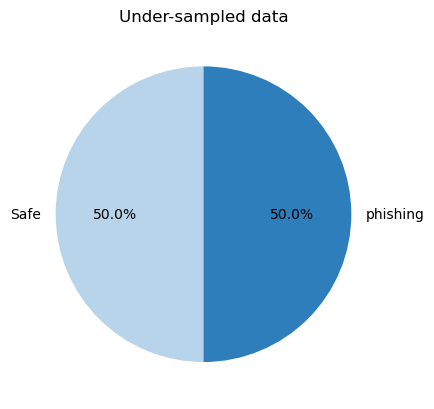

In [56]:
import matplotlib.pyplot as plt
categories = [0,1]

email_type_counts = y_train_rus.value_counts()

categories = ['Safe', 'phishing']


colors = ['teal', 'palevioletred']


# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(categories, email_type_counts, color=colors)


# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Under-sampled data')
plt.xticks(categories) 

# Show the plot
plt.show()

sizes = [50,50]  # Sizes of each pie slice
labels = ['Safe', 'phishing']  # Labels for each slice


col = plt.cm.Blues(np.linspace(0.3, 0.7, len(categories)))
# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=col, startangle = 90)

# Add title
plt.title('Under-sampled data')

# Show the plot
plt.show()

In [57]:
###################### Models ######################################

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [59]:
classifier = RandomForestClassifier(n_estimators=10)

In [60]:
classifier.fit(X_train,y_train)

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
s_ypred = classifier.predict(x_test)
accuracy = accuracy_score(y_test,s_ypred )
precision = precision_score(y_test,s_ypred, pos_label=1 )
recall = recall_score(y_test,s_ypred, pos_label=1)
f1 = f1_score(y_test,s_ypred, pos_label=1 )

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9124
Precision: 0.9100
Recall: 0.9052
F1-Score: 0.9076


In [61]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object

abc = AdaBoostClassifier(n_estimators=100,base_estimator=RandomForestClassifier(),learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
s_ypred = model1.predict(x_test)
accuracy = accuracy_score(y_test,s_ypred )
precision = precision_score(y_test,s_ypred, pos_label=1 )
recall = recall_score(y_test,s_ypred, pos_label=1)
f1 = f1_score(y_test,s_ypred, pos_label=1 )

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9185
Precision: 0.9014
Recall: 0.9302
F1-Score: 0.9156


In [62]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
s_ypred = XGB.predict(x_test)
accuracy = accuracy_score(y_test,s_ypred )
precision = precision_score(y_test,s_ypred, pos_label=1 )
recall = recall_score(y_test,s_ypred, pos_label=1)
f1 = f1_score(y_test,s_ypred, pos_label=1 )

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9125
Precision: 0.8959
Recall: 0.9230
F1-Score: 0.9092


In [63]:
#SVM
from sklearn.svm import SVC
SVMN = SVC(C = 100, gamma = "auto", probability=True)
SVMN.fit(X_train,y_train)
s_ypred = SVMN.predict(x_test)
accuracy = accuracy_score(y_test,s_ypred )
precision = precision_score(y_test,s_ypred, pos_label=1 )
recall = recall_score(y_test,s_ypred, pos_label=1)
f1 = f1_score(y_test,s_ypred, pos_label=1 )

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8581
Precision: 0.8839
Recall: 0.8073
F1-Score: 0.8439


In [64]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
s_ypred = KNN.predict(x_test)
accuracy = accuracy_score(y_test,s_ypred )
precision = precision_score(y_test,s_ypred, pos_label=1 )
recall = recall_score(y_test,s_ypred, pos_label=1)
f1 = f1_score(y_test,s_ypred, pos_label=1 )

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9112
Precision: 0.9004
Recall: 0.9143
F1-Score: 0.9073


In [65]:
from sklearn.tree import DecisionTreeClassifier
DT =  DecisionTreeClassifier(random_state=0)
DT.fit(X_train,y_train)
s_ypred = DT.predict(x_test)
accuracy = accuracy_score(y_test,s_ypred )
precision = precision_score(y_test,s_ypred, pos_label=1 )
recall = recall_score(y_test,s_ypred, pos_label=1)
f1 = f1_score(y_test,s_ypred, pos_label=1 )

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8860
Precision: 0.8755
Recall: 0.8861
F1-Score: 0.8807


In [66]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR .fit(X_train,y_train)
s_ypred = LR.predict(x_test)
accuracy = accuracy_score(y_test,s_ypred )
precision = precision_score(y_test,s_ypred, pos_label=1 )
recall = recall_score(y_test,s_ypred, pos_label=1)
f1 = f1_score(y_test,s_ypred, pos_label=1 )

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.8247
Precision: 0.8858
Recall: 0.7241
F1-Score: 0.7969


In [67]:
#Voting
from sklearn.ensemble import VotingClassifier

In [68]:

# Create a voting classifier with different models
voting_clf = VotingClassifier(
    estimators=[('lr', LR), ('dt', DT), ('svc', SVMN),('KNN', KNN),('RF', classifier)],
    voting='soft'  # or 'soft' for soft voting
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

accuracy = accuracy_score(y_test,y_pred )
precision = precision_score(y_test,y_pred, pos_label=1 )
recall = recall_score(y_test,y_pred, pos_label=1)
f1 = f1_score(y_test,y_pred, pos_label=1 )

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9124
Accuracy: 0.9124
Precision: 0.9046
Recall: 0.9117
F1-Score: 0.9081


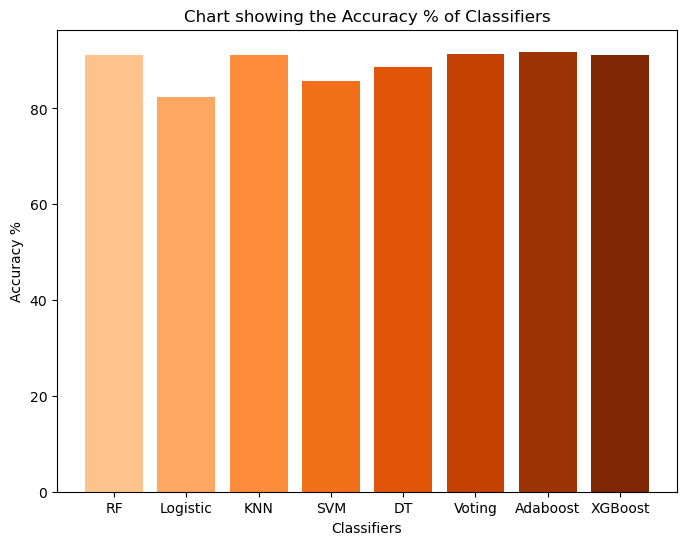

In [69]:
import matplotlib.pyplot as plt
values = [91.23,82.4,91.12,85.79,88.65,91.3,91.85,91.2]
categories = ['RF', 'Logistic', 'KNN', 'SVM', 'DT','Voting','Adaboost','XGBoost']

#custom_order = ['Unique Receiver', 'Receiver', 'Unique Sender', 'Sender','Total']

# Reorder the categories and values based on the custom order
#ordered_values = [values[categories.index(cat)] for cat in custom_order]

colors = plt.cm.Oranges(np.linspace(0.3, 1, len(categories)))
# Create a plot
plt.figure(figsize=(8, 6))
plt.bar(categories, values , color=colors)

# Add labels and title

plt.xlabel('Classifiers')
plt.ylabel('Accuracy %')
plt.title('Chart showing the Accuracy % of Classifiers')

#plt.xticks(rotation=90)

# Show the plot
plt.show()

In [70]:
################ new data #######################

In [71]:
new_df1= pd.read_csv("New_data.csv")

############# Data loading ############

new_dfa=pd.DataFrame(data=new_df1)


new_dfa['urls'].replace(int(0),'URL_Exists',inplace=True)
new_dfa['urls'].replace(int(1),'NO_URL',inplace=True)

new_dfa = new_dfa[['sender', 'receiver', 'date', 'subject','body', 'urls']]

new_FX=new_dfa.iloc[:,0:6]

new_FX=pd.DataFrame(new_FX)


    
new_FX['body'] = new_FX['body'].apply(change_lower)
new_FX['sender'] = new_FX['sender'].apply(change_lower)
new_FX['receiver'] = new_FX['receiver'].apply(change_lower)
new_FX['date'] = new_FX['date'].apply(change_lower)
new_FX['subject'] = new_FX['subject'].apply(change_lower)



new_FX['body'] = new_FX['body'].apply(remove_stopwords)
new_FX['subject'] = new_FX['subject'].apply(remove_stopwords)



new_FX['subject'] = new_FX['subject'].apply(remove_punctuation)
new_FX['body'] = new_FX['body'].apply(remove_punctuation)


new_FX['body'] = new_FX['body'].apply(lemmatize_text)
new_FX['subject'] = new_FX['subject'].apply(lemmatize_text)

new_FX['combined'] = new_FX['sender'] + ' ' + new_FX['receiver']+ ' ' + new_FX['subject']+ ' ' + new_FX['body']+ ' ' + new_FX['urls']

new_FX1=pd.DataFrame(new_FX['combined'])
new_FX1

n_components = 5  


pipeline = make_pipeline(vectorizer, lsa)

New_reduced_features = pipeline.transform(new_FX1['combined'])


New_reduced_FX = pd.DataFrame(New_reduced_features, columns=[f'component_{i+1}' for i in range(n_components)])


newdata = New_reduced_FX


new_pred = model1.predict(newdata )
new_pred1=''
if new_pred==1:
    new_pred1='Phishing Email'
else:
    new_pred1='Safe Email'

print('Predicted:',new_pred1)



Predicted: Phishing Email
